## Geographic PPP Breakdown
#### This notebook is a break down and analysis of California PPP loans by County

Data Used:

California_PPP.csv - This contains a list of all the PPP loans - for this analysis the loan amounts and the cities were Used

https://www.cdtfa.ca.gov/taxes-and-fees/rates.aspx - Since the PPP data did not include the borrower county, this data set was used as it supplied both cities and california_counties

County_Data.csv - This data set was taken from data.ca.gov it provides the Longitude and Latitude of the counties as well population and other infomation


In [1]:
#this code pulls in neccessary libraries and our main data set.  Please note that this notebook uses a google api and will have to be added to the config file

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps


file_path = '..\Resources\California_PPP.csv'

california_df=pd.read_csv(file_path)
california_df.shape

(1302241, 23)

In [3]:
#this code takes the county and city from cdtfa and cleans it removing special characters and ()


url ='https://www.cdtfa.ca.gov/taxes-and-fees/rates.aspx'

california_counties_pull = pd.read_html(url, header=0)
california_counties = california_counties_pull[0]
california_counties = california_counties[['Location', 'County']]
california_counties['Location'] = california_counties['Location'].str.replace('*','', regex = False)
california_counties['Location'] = california_counties['Location'].str.replace(r"\(.*\)","")
california_counties['Location']  = california_counties['Location'].str.strip()
california_counties=california_counties.rename(columns={'Location': 'BorrowerCity'})
california_counties


#this cleans the city column to prepare for merge

california_df.columns

title_case = california_df['BorrowerCity'].str.title()
california_df['BorrowerCity'] = title_case
california_df['BorrowerCity'] = california_df['BorrowerCity'].replace(
    {'City Of Industry': 'City of Industry','Carmel':'Carmel-by-the-Sea', 'Carmel-By-The-Sea': 'Carmel-by-the-Sea',
    'Huntingtn Bch':'Huntington Beach','Rch Cucamonga':'Rancho Cucamonga','N Hollywood':'North Hollywood','La Canada Flintridge':'La Canada- Flintridge',
    'Woodland Hls':'Woodland Hills','La Canada':'La Canada- Flintridge','Playa Vista':'Los Angeles','Newport Coast':'Newport Beach'})



<ipython-input-3-e4cd8638ef09>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_counties['Location'] = california_counties['Location'].str.replace('*','', regex = False)
<ipython-input-3-e4cd8638ef09>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  california_counties['Location'] = california_counties['Location'].str.replace(r"\(.*\)","")
<ipython-input-3-e4cd8638ef09>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_counties['Locati

In [4]:
#this pulls in county lat lon, population data from https://data.ca.gov/dataset/b-6-comparison-by-county2/resource/02ec81f7-2d3c-446d-a1a0-1387647d2d15

file_path = '..\Resources\County_Data.csv'

county_df=pd.read_csv(file_path)
county_df=county_df.loc[county_df['Taxable Year']==2018]
county_df=county_df[['County','Population','AGI','Latitude','Longitude']]
county_df

,County,Population,AGI,Latitude,Longitude
41,Alameda,1662730.0,8.948891e+10,37.720226,-122.164352
75,Colusa,22260.0,6.626438e+08,39.167981,-122.299067
98,Glenn,28755.0,6.175000e+08,39.590287,-122.078097
103,Yolo,222054.0,6.988605e+09,38.683827,-121.912742
142,Santa Clara,1955946.0,1.535260e+11,37.234238,-121.731723
...,...,...,...,...,...
1292,Tehama,64703.0,1.111567e+09,40.255064,-122.293772
1300,Madera,158511.0,2.860856e+09,37.096371,-119.890430
1319,Calaveras,44572.0,1.248550e+09,38.254627,-120.465738
1394,Solano,439975.0,1.420713e+10,38.176818,-122.035299


In [5]:
#this merges the county table from cdtfa with our ppp data set

california_df_merge = pd.merge(california_df, california_counties, on="BorrowerCity", how="left")

#this finds the rows that does not have counties, there are numerous miss spellings so we cleaned the data down to less than 1% of the total data set
pd.isna(california_df_merge['County']).sum()
df_no_county = california_df_merge.loc[california_df_merge['County'].isna()]
print(df_no_county["LoanNumber"].count())
df_bin = df_no_county.groupby("BorrowerCity")
df_bin.count().sort_values("LoanNumber", ascending=False).head(10)


12737


,LoanNumber,DateApproved,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerState,BorrowerZip,CurrentApprovalAmount,RuralUrbanIndicator,HubzoneIndicator,...,NAICSCode,Race,PAYROLL_PROCEED,BusinessType,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,County
BorrowerCity,,,,,,,,,,,,,,,,,,,,,
Mckinleyville,300,300,300,300,300,300,300,300,300,300,...,297,300,300,300,300,300,300,300,300,0
W Hollywood,279,279,279,279,279,279,279,279,279,279,...,268,279,279,279,279,279,279,279,279,0
Sn Bernrdno,259,259,259,259,259,259,259,259,259,259,...,248,259,259,259,259,259,259,259,259,0
Oak Hills,228,228,228,228,228,228,228,228,228,228,...,225,228,228,228,228,228,228,228,228,0
Westlake Vlg,226,226,226,226,226,226,226,226,226,226,...,216,226,226,226,226,226,226,226,226,0
S Lake Tahoe,218,218,218,218,218,218,218,218,218,218,...,195,218,218,218,218,218,218,218,218,0
Lake Balboa,216,216,216,216,216,216,216,216,216,216,...,208,216,216,216,216,216,216,216,216,0
S San Fran,214,214,214,214,214,214,214,214,214,214,...,212,214,214,214,214,214,214,214,214,0
Cardiff,212,212,212,212,212,212,212,212,212,212,...,200,212,211,212,212,212,212,212,212,0


In [6]:
#This creates the county data by PPP and PPS
california_df_county = california_df_merge[['LoanNumber','CurrentApprovalAmount','County','ProcessingMethod']]

california_df_county_ppp = california_df_county.loc[california_df_county["ProcessingMethod"]=="PPP"]
california_df_county_pps = california_df_county.loc[california_df_county["ProcessingMethod"]=="PPS"]




In [22]:
#This is PPP county Data

county_group_ppp = california_df_county_ppp.groupby('County')
ppp_loan_count = county_group_ppp['CurrentApprovalAmount'].count()
ppp_loan_amount = county_group_ppp['CurrentApprovalAmount'].sum()/1000000

total_loan_count_ppp = ppp_loan_count.sum()
total_loan_sum_ppp = ppp_loan_amount.sum()


ppp_county = pd.merge(ppp_loan_count, ppp_loan_amount, on="County", how="left")
ppp_county=ppp_county.rename(columns={'CurrentApprovalAmount_x': 'Loan Count','CurrentApprovalAmount_y': 'Loan Amount (Millions)'})
ppp_county["Count %"] = ppp_county["Loan Count"]/total_loan_count_ppp
ppp_county["Amount %"] = ppp_county["Loan Amount (Millions)"]/total_loan_sum_ppp

ppp_county = pd.merge(ppp_county, county_df, on="County", how="left")
ppp_county["AGI"]=ppp_county["AGI"]/1000000
ppp_county=ppp_county.rename(columns={'AGI': 'AGI (Millions)'})
ppp_county["Amount Per Person"]=(ppp_county["Loan Amount (Millions)"]*1000000)/ppp_county["Population"]

ppp_county.sort_values("Loan Amount (Millions)", ascending=False)


,County,Loan Count,Loan Amount (Millions),Count %,Amount %,Population,AGI (Millions),Latitude,Longitude,Amount Per Person
18,Los Angeles,323117,21474.230487,0.343104,0.287401,10269935.0,331343.000000,34.059483,-118.242048,2090.980175
29,Orange,87502,8343.040584,0.092915,0.111659,3215372.0,139542.000000,33.660734,-117.936137,2594.735721
36,San Diego,74351,6435.608582,0.078950,0.086131,3344438.0,118521.000000,32.789640,-117.193658,1924.272055
0,Alameda,41089,4056.945323,0.043631,0.054296,1662730.0,89488.907459,37.720226,-122.164352,2439.930309
42,Santa Clara,36750,4015.774333,0.039023,0.053745,1955946.0,153526.000000,37.234238,-121.731723,2053.111043
37,San Francisco,30035,3404.610667,0.031893,0.045566,886618.0,81884.509966,37.757700,-122.437600,3839.997233
32,Riverside,44785,2812.927343,0.047555,0.037647,2420714.0,56781.365151,33.777574,-115.470693,1162.023825
35,San Bernardino,44993,2692.858845,0.047776,0.036040,2178940.0,49104.644374,34.522586,-115.537257,1235.857272
33,Sacramento,32120,2190.670012,0.034107,0.029319,1537386.0,44179.011186,38.192378,-121.602064,1424.931677
6,Contra Costa,25139,1901.416342,0.026694,0.025448,1147327.0,56590.780658,37.988180,-121.937140,1657.257558


In [17]:
#ppp heat map Loan Amount
from config import gkey
gmaps.configure(api_key=gkey)

locations = ppp_county[["Latitude", "Longitude"]].astype(float)
loan_amount = ppp_county["Loan Amount (Millions)"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=loan_amount, dissipating=False, max_intensity=21500, point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [18]:
#ppp heat map Loan Amount per capita
from config import gkey
gmaps.configure(api_key=gkey)

locations = ppp_county[["Latitude", "Longitude"]].astype(float)
loan_amount = ppp_county["Amount Per Person"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=loan_amount, dissipating=False, max_intensity=4000, point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [15]:
#This is PPS county Data

county_group_pps = california_df_county_pps.groupby('County')
pps_loan_count = county_group_pps['CurrentApprovalAmount'].count()
pps_loan_amount = county_group_pps['CurrentApprovalAmount'].sum()/1000000

total_loan_count_pps = pps_loan_count.sum()
total_loan_sum_pps = pps_loan_amount.sum()


pps_county = pd.merge(pps_loan_count, pps_loan_amount, on="County", how="left")
pps_county=pps_county.rename(columns={'CurrentApprovalAmount_x': 'Loan Count','CurrentApprovalAmount_y': 'Loan Amount (Millions)'})
pps_county["Count %"] = pps_county["Loan Count"]/total_loan_count_pps
pps_county["Amount %"] = pps_county["Loan Amount (Millions)"]/total_loan_sum_pps

pps_county = pd.merge(pps_county, county_df, on="County", how="left")
pps_county["AGI"]=pps_county["AGI"]/1000000
pps_county=pps_county.rename(columns={'AGI': 'AGI (Millions)'})
pps_county["Amount Per Person"]=(pps_county["Loan Amount (Millions)"]*1000000)/pps_county["Population"]

pps_county.sort_values("Loan Amount (Millions)", ascending=False)


,County,Loan Count,Loan Amount (Millions),Count %,Amount %,Population,AGI (Millions),Latitude,Longitude,Amount Per Person
18,Los Angeles,123793,8903.289006,0.349080,0.308090,10269935.0,331343.000000,34.059483,-118.242048,866.927493
29,Orange,36278,3266.553838,0.102299,0.113036,3215372.0,139542.000000,33.660734,-117.936137,1015.917859
36,San Diego,28960,2512.439561,0.081663,0.086941,3344438.0,118521.000000,32.789640,-117.193658,751.229223
42,Santa Clara,15903,1561.953556,0.044844,0.054050,1955946.0,153526.000000,37.234238,-121.731723,798.566809
0,Alameda,16590,1526.182044,0.046782,0.052812,1662730.0,89488.907459,37.720226,-122.164352,917.877253
37,San Francisco,13291,1403.370639,0.037479,0.048562,886618.0,81884.509966,37.757700,-122.437600,1582.835718
32,Riverside,14600,1049.402431,0.041170,0.036314,2420714.0,56781.365151,33.777574,-115.470693,433.509465
35,San Bernardino,13724,913.583043,0.038700,0.031614,2178940.0,49104.644374,34.522586,-115.537257,419.278660
40,San Mateo,7532,770.520095,0.021239,0.026663,774570.0,76789.387694,37.439441,-122.334460,994.771415
33,Sacramento,10328,731.838471,0.029124,0.025325,1537386.0,44179.011186,38.192378,-121.602064,476.027797


In [12]:
#pps heat map Loan Amount
from config import gkey
gmaps.configure(api_key=gkey)

locations = pps_county[["Latitude", "Longitude"]].astype(float)
loan_amount = pps_county["Loan Amount (Millions)"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=loan_amount, dissipating=False, max_intensity=9000, point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [16]:
#pps heat map Loan Amount per capita
from config import gkey
gmaps.configure(api_key=gkey)

locations = pps_county[["Latitude", "Longitude"]].astype(float)
loan_amount = pps_county["Amount Per Person"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=loan_amount, dissipating=False, max_intensity=2000, point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

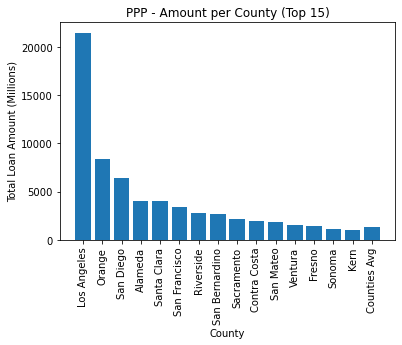

In [65]:
#ppp bar graph total

ppp_average = ppp_county['Loan Amount (Millions)'].mean()
average_df = pd.DataFrame({'County':['Counties Avg'],'Loan Amount (Millions)':[ppp_average]})

ppp_top15 = ppp_county.sort_values("Loan Amount (Millions)", ascending=False).head(15)
ppp_top15 = ppp_top15.append(average_df, ignore_index=True)


plt.bar(ppp_top15["County"], ppp_top15["Loan Amount (Millions)"])
plt.xticks(ppp_top15["County"], rotation = 90)
plt.xlabel("County")
plt.ylabel("Total Loan Amount (Millions)")
plt.title("PPP - Amount per County (Top 15)")
plt.show()



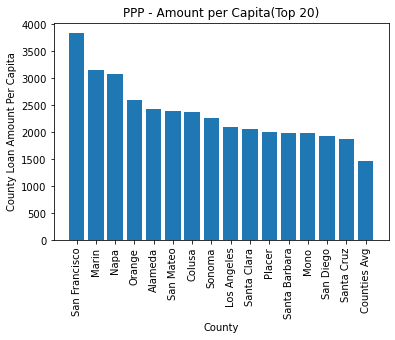

In [62]:
#ppp bar graph capita

ppp_average_cap = ppp_county['Amount Per Person'].mean()
average_df = pd.DataFrame({'County':['Counties Avg'],'Amount Per Person':[ppp_average_cap]})

ppp_top15 = ppp_county.sort_values("Amount Per Person", ascending=False).head(15)
ppp_top15 = ppp_top15.append(average_df, ignore_index=True)


plt.bar(ppp_top15["County"], ppp_top15['Amount Per Person'])
plt.xticks(ppp_top15["County"], rotation = 90)
plt.xlabel("County")
plt.ylabel("County Loan Amount Per Capita")
plt.title("PPP - Amount per Capita(Top 15)")
plt.show()

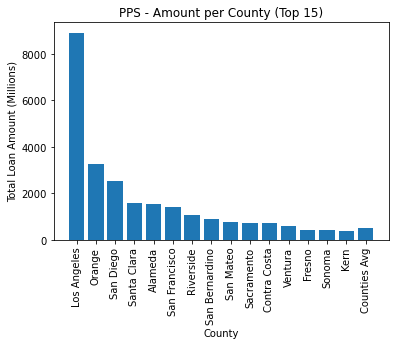

In [63]:
#pps bar graph total

pps_average = pps_county['Loan Amount (Millions)'].mean()
average_df = pd.DataFrame({'County':['Counties Avg'],'Loan Amount (Millions)':[pps_average]})

pps_top15 = pps_county.sort_values("Loan Amount (Millions)", ascending=False).head(15)
pps_top15 = pps_top15.append(average_df, ignore_index=True)


plt.bar(pps_top15["County"], pps_top15["Loan Amount (Millions)"])
plt.xticks(pps_top15["County"], rotation = 90)
plt.xlabel("County")
plt.ylabel("Total Loan Amount (Millions)")
plt.title("PPS - Amount per County (Top 15)")
plt.show()

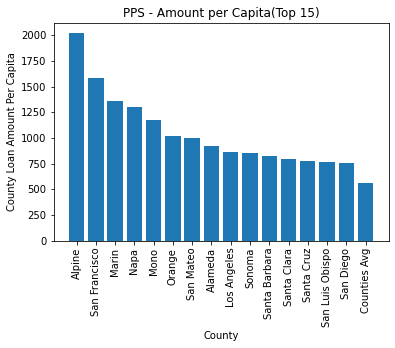

In [64]:
#pps bar graph capita

pps_average_cap = pps_county['Amount Per Person'].mean()
average_df = pd.DataFrame({'County':['Counties Avg'],'Amount Per Person':[pps_average_cap]})

pps_top15 = pps_county.sort_values("Amount Per Person", ascending=False).head(15)
pps_top15 = pps_top15.append(average_df, ignore_index=True)


plt.bar(pps_top15["County"], pps_top15['Amount Per Person'])
plt.xticks(pps_top15["County"], rotation = 90)
plt.xlabel("County")
plt.ylabel("County Loan Amount Per Capita")
plt.title("PPS - Amount per Capita(Top 15)")
plt.show()